# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 2: Numerical Integration (or Quadrature) <a class="tocSkip">
    
###  Homework Exercises - Solutions<a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Implement-the-composite-version-of-the-trapezoidal-rule" data-toc-modified-id="Homework---Implement-the-composite-version-of-the-trapezoidal-rule-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Implement the composite version of the trapezoidal rule</a></span></li><li><span><a href="#Homework---Implement-Weddle's-rule" data-toc-modified-id="Homework---Implement-Weddle's-rule-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Implement Weddle's rule</a></span></li><li><span><a href="#Homework---Midpoint-rule-error-[$\star$]" data-toc-modified-id="Homework---Midpoint-rule-error-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Midpoint rule error [$\star$]</a></span></li><li><span><a href="#Homework---Derive-Simpson's-rule-as-quadratic-fit-[$\star$]" data-toc-modified-id="Homework---Derive-Simpson's-rule-as-quadratic-fit-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Derive Simpson's rule as quadratic fit [$\star$]</a></span></li><li><span><a href="#Homework---Open-vs-closed-Newton-Cotes-[$\star$]" data-toc-modified-id="Homework---Open-vs-closed-Newton-Cotes-[$\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Open vs closed Newton-Cotes [$\star$]</a></span></li><li><span><a href="#Homework---Implement-adaptive-quadrature-[$\star\star$]" data-toc-modified-id="Homework---Implement-adaptive-quadrature-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Implement adaptive quadrature [$\star\star$]</a></span></li><li><span><a href="#Homework---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature-[$\star\star$]" data-toc-modified-id="Homework---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature-[$\star\star$]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Implement a "composite" version of Gauss-Legendre quadrature [$\star\star$]</a></span></li></ul></li></ul></div>

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# we're going to be using some SciPy in-built integration routines
import scipy.integrate as si

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Implement the composite version of the trapezoidal rule

In the lecture we implemented the naive version of the trapezoidal rule over multiple subintervals - we noted that this implementation has redundant function evaluations.

Implement a composite version based upon the discussion in the lecture which minimises function evaluations and test it against the function `trapezoidal_rule`.

Think about how you can make the *verification* of your new code against the one from the Lecture as rigorous as possible.

In [ ]:
def f(x):
    return np.sin(x)

def trapezoidal_rule(f, a, b, interval_number=10):
    interval_size = (b-a) / interval_number
    
    xi = np.linspace(a, b, interval_number + 1)
    
    I_x = f(xi) * 2
    I_x[0] -= f(xi[0])
    I_x[-1] -= f(xi[-1])
    I = np.sum(I_x) * interval_size / 2
    
    return I

interval_numver = [2,4,8,16,32,64,100,1000]
area = np.zeros(interval_numver)
for i, num in enumerate(interval_numver):
    area[i] = trapezoidal_rule(f, 0., np.pi, interval_number=num)
    error[i] = np.abs(2 - area[i])
    print('the approximation is {:f}, the corrsponding error is {:f}'.format(area[i], error[i]))


## Homework - Implement Weddle's rule

As explained in the lecture, we can implement Weddle's rule using appropriate calls to the `simpsons_composite_rule` function.

Do this and try to recreate the convergence plot from the lecture:

<img src="./figures/weddle_convergence.png" width=500x>



In [11]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

Area 2    for Simpson = 1.9985707318238357 (error = 1.429268176e-03)
Area 4    for Simpson = 1.9999831309459855 (error = 1.686905401e-05)
Area 8    for Simpson = 1.9999997524545721 (error = 2.475454279e-07)
Area 16   for Simpson = 1.9999999961908446 (error = 3.809155436e-09)
Area 32   for Simpson = 1.9999999999407072 (error = 5.929279290e-11)
Area 100  for Simpson = 1.9999999999999376 (error = 6.239453398e-14)
Area 1000 for Simpson = 1.9999999999999991 (error = 8.881784197e-16)
Area 2    for Simpson = 2.0045597549844207 (error = 4.559754984e-03)
Area 4    for Simpson = 2.0002691699483877 (error = 2.691699484e-04)
Area 8    for Simpson = 2.0000165910479355 (error = 1.659104794e-05)
Area 16   for Simpson = 2.0000010333694127 (error = 1.033369413e-06)
Area 32   for Simpson = 2.0000000645300018 (error = 6.453000179e-08)
Area 100  for Simpson = 2.0000000006764709 (error = 6.764708793e-10)
Area 1000 for Simpson = 2.0000000000000679 (error = 6.794564911e-14)


NameError: name 'interval_sizes_T' is not defined

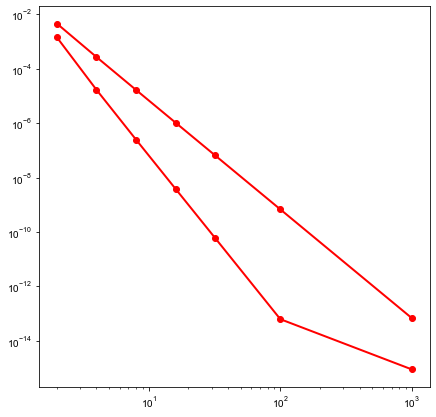

In [12]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

def weddle_rule(a, b, f, interval_number=10):
    interval_size = (b - a) / interval_number
    
    assert interval_number % 2 == 0
    assert b - a > 0
    
    IS1 = simpsons_composite_rule(a, b, f, interval_number)
    IS2 = simpsons_composite_rule(a, b, f, interval_number * 2)
    
    return IS2 + (IS2 - IS1) / 15



    
# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)

interval_sizes_S = [2, 4, 8, 16, 32, 100, 1000]
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
areas_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = weddle_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(areas_S[i] - 2)
    print('Area {:<4d} for Simpson = {:.16f} (error = {:.9e})'.format(
        number_intervals, areas_S[i], errors_S[i]))

ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='weddle')

for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = simpsons_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(areas_S[i] - 2)
    print('Area {:<4d} for Simpson = {:.16f} (error = {:.9e})'.format(
        number_intervals, areas_S[i], errors_S[i]))
    
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')

ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)

annotation.slope_marker((5e1, 2e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((5e1, 5e-9), (-4, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));
annotation.slope_marker((5e1, 5e-9), (-4, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

## Homework - Midpoint rule error [$\star$]

In class we stated that a bound on the midpoint rule's error is given by

$$ \left| E_M^n \right| \le \frac{(b-a)^3}{24n^2}  \max_{x\in[a,b]}\, \left| f''(x) \right|. $$

And we noted that for midpoint (and all odd order Newton-Cotes rules including Simpson's rule) we gain an order of precision/accuracy over what we might expect, i.e. here this error bound indicates that the method is second-order accurate
and integrates linear polynomials exactly.

If we follow the error bound derivation we performed in lecture for the Trapezoidal rule, we would progress by
taking $N=0$ (as the midpoint rule is fitting a constant, degree zero, function) and using our Lagrange remainder result to estimate the *interpolation error* over the interval $[a,b]$ as:

$$R_0(x) = \left(x - \frac{1}{2}(a+b)\right) {f'(c_x)}.$$

Our Midpoint rule quadrature error over a single interval $[a,b]$ could then be estimated via

\begin{align*}
E_M \equiv E_0 = I - I_0 
&= \int_{a}^{b} f\left ( x \right )\, dx - \int_a^b\,P_0\left ( x \right )\,dx \\[5pt]
&= \int_{a}^{b} f\left ( x \right ) - P_0\left ( x \right ) \, dx\\[5pt] 
&= \int_{a}^{b} R_0\left ( x \right )\, dx.
\end{align*}

Substitute in the above expression for $R_0(x)$ and demonstrate that this leading order term in the error expansion is indeed zero.

Once you've convinced yourself of this take a look at my derivation of the error bound which involves taking the next order term in the Taylor series expansion about the midpoint of an interval.

## Homework - Derive Simpson's rule as quadratic fit [$\star$]

We stated in the lecture that:

Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation. We'll come back to this idea a bit later.

Take a look also at the Newton-Cotes section of the lecture where we derived the Trapezoidal rule with the choice $N=1$. We arrive at Simpson's (1/3) rule if we repeat this process with $N=2$.

Do this.

**Hint:** Note that following the derivation of the Trapezoidal rule from lectures you will need to evaluate integrals of the form

\begin{align*}
A_0 &= \int_{x_0}^{x_2}\, \ell_0(x)\, dx \\[5pt]
& = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx.
\end{align*}

This integral is much easier to do if you introduce the new variable (i.e. a [change of variables](https://en.wikipedia.org/wiki/Integration_by_substitution)) $\xi$ such that $d\xi = dx$ and $\xi=0$ corresponds to $x_1$, $\xi = -h$ corresponds to $x_0$ and $\xi = h$ corresponds to $x_2$. Note therefore that the interval size $x_2-x_0 = 2h$. 

Your integral then becomes

\begin{align*}
A_0 & = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx \\[5pt]
& = \frac{1}{(-h)(-2h)}\int_{-h}^{h}\, \xi(\xi - h) \, d\xi = \ldots = \frac{h}{3}.
\end{align*}

Fill in the gaps and do the other integrals to complete the derivation.

## Homework - Open vs closed Newton-Cotes [$\star$]

Implement an open Newton-Cotes formula and use it to integrate $1/\sqrt{x}$  from 0 to 1. 

**Hint:** Check the open formulae here <https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas#Open_Newton%E2%80%93Cotes_formulas>.  My solution makes use of  Milne's rule which evaluates the function at the appropriate points within each sub-interval, and so uses more function evaluations for a given number of intervals compared to the composite version of Simpson's rule.

Compare your solution with a closed scheme such as Simpson's, e.g. by recreating a convergence plot such as that presented in the Lecture.

**Hint:**  Note that to avoid divide by zero warning you could define your integrand via something like:
`lambda x: 1./(np.maximum(1e-16,np.sqrt(x)))`

In [14]:
def f(x):
    return 1. / np.sqrt(x)

a = 0.
b = 1.
number_intervals = [2,4,8,16,32,64,100,1000]

I = np.zeros(len(number_intervals))
for i, number_interval in enumerate(number_intervals):
    I[i] = simpsons_composite_rule(a, b, lambda x: 1./(np.maximum(1e-16,np.sqrt(x))), number_interval)
    print(i, I[i])
    

0 1666666666666667.5
1 833333333333334.5
2 416666666666668.1
3 208333333333335.0
4 104166666666668.39
5 52083333333335.125
6 33333333333335.184
7 3333333333335.258


## Homework - Implement adaptive quadrature [$\star\star$]

Based on the algorithm description from the lecture, try to implement an adaptive quadrature algorithm and apply it to our complicated function given in the following cell.

**Hint:**  My function and docstring starts

```Python
def adaptive_simpson_recursive(a, b, function, tol, S):
    """ S is a Simpson rule estimate of the integral over interval [a,b]
    This function computes S2 by splitting the current interval in half 
    and evaluating Simpson's rule over each of the two resulting sub-intervals. 
    It then evaluates an estimate of the quadrature error over the interval as 
    (S2-S)/15, and if we have not yet reached the desired error tolerance it 
    divides the current interval [a,b] in two and applies the same function to 
    each half: [a,c] and [c,b]. 
    If an error tolerance has been reached it returns the Weddle estimate for
    the integral over [a,b]: S2 + (S2 - S)/15.0.
    The function recursively sums the result from each subinterval considered. 
    `locs' is a global variable that contains all the locations we evaluate the
    function at.
    """
```

In [ ]:
# a more complex example (taken from Moin which quotes the exact integral as −0.56681975015)

def f(x):
    """The function we wish to integrate.
    
    This a more complicated example which has been taken from the book by Moin.
    """
    return (10*np.exp(-50*np.abs(x)) -
            (0.01/(np.power(x-0.5, 2) + 0.001)) +
            5*np.sin(5*x))

# exact solution obtained with (si.quad(f, -1, 1, epsabs=1e-16))
# NB. the "exact" value given in Moin only to 11 s.f.s: −0.56681975015
I_exact = -0.5668197501529302

## Homework - Implement a "composite" version of Gauss-Legendre quadrature [$\star\star$]

Implement a "composite" version of Gauss-Legendre, i.e. split up the total interval into sub-intervals, apply Gauss-Legendre on each subinterval and sum.

Compare this method, for differing degrees, against the composite Simpson rule for our $\sin$ and more complex function we considered in lecture.